In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_json('data\BA_AQI_COUNTIES.json')

In [98]:
df = pd.read_csv('data\Max_PM25.csv')

In [99]:
df_original = df.copy()

<AxesSubplot:xlabel='date_local', ylabel='arithmetic_mean'>

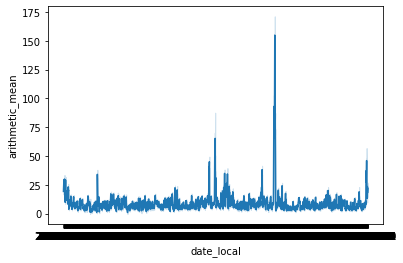

In [9]:
sns.lineplot(data=df, x='date_local', y='arithmetic_mean')

In [101]:
df['date_local'] = pd.to_datetime(df['date_local'])

In [102]:
df.dtypes

date_local         datetime64[ns]
county                     object
local_site_name            object
poc                         int64
arithmetic_mean           float64
first_max_value           float64
first_max_hour              int64
city                       object
dtype: object

<AxesSubplot:xlabel='date_local', ylabel='arithmetic_mean'>

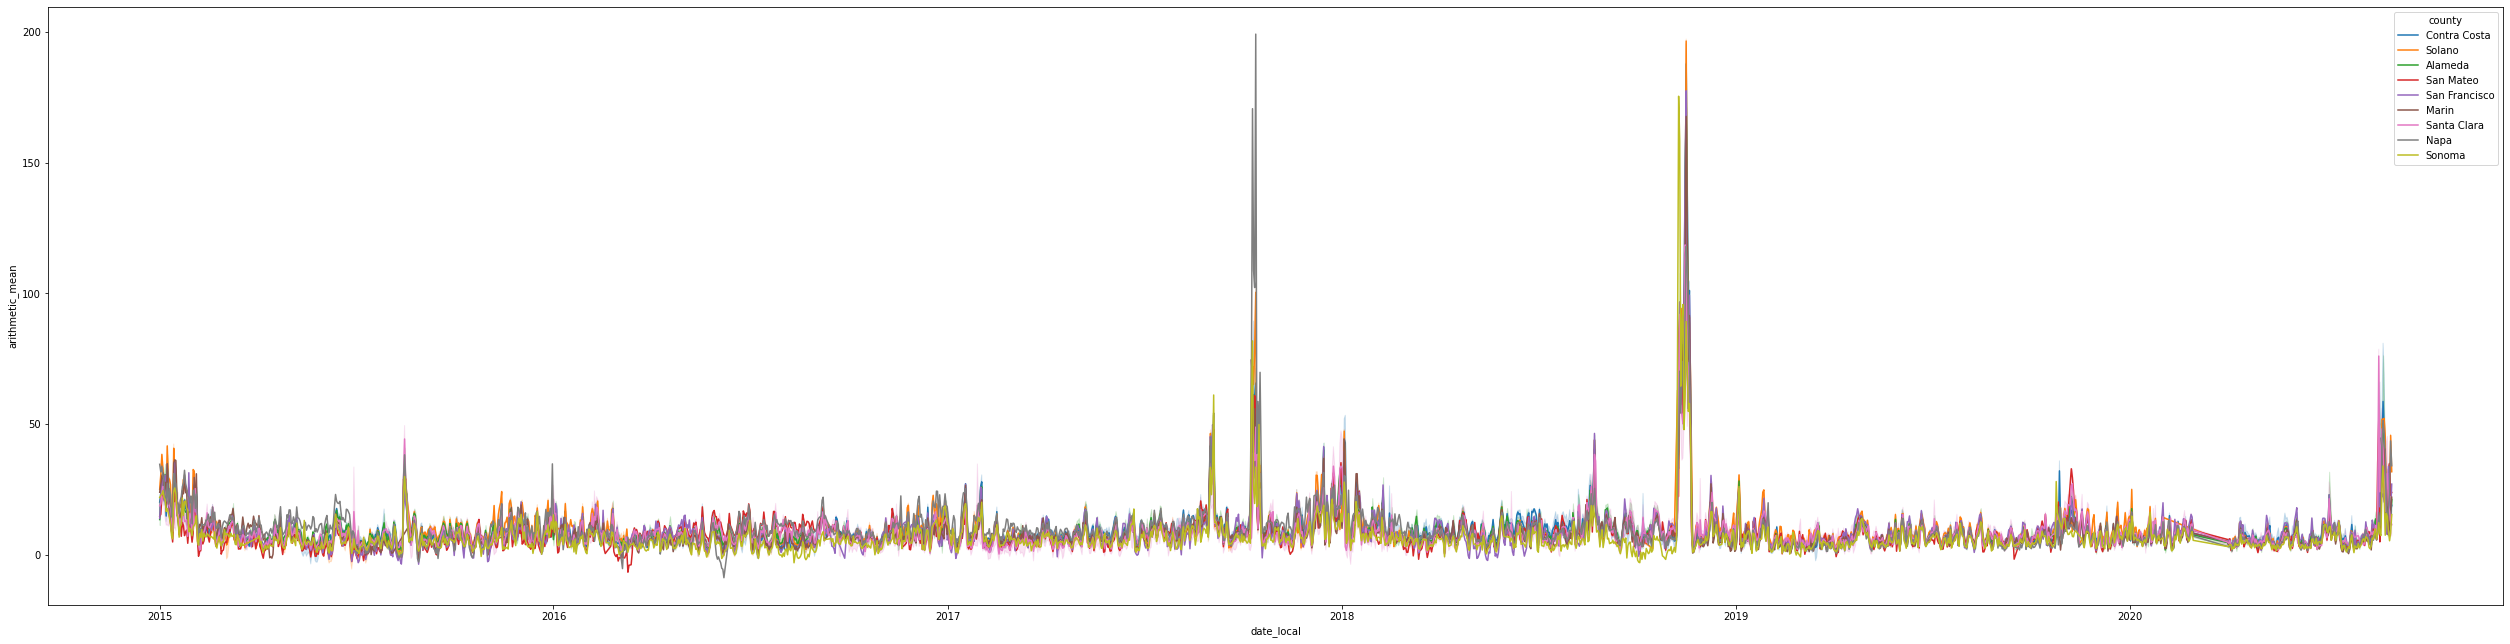

In [21]:
fig, ax = plt.subplots(figsize=(44,11))
sns.lineplot(data=df, ax=ax, x='date_local', y='arithmetic_mean', hue='county')

In [ ]:
# I want to look at each county, each year
df.head(60)

In [103]:
# making a df for testing
df['year'] = df['date_local'].dt.year
df['month'] = df['date_local'].dt.month
df['day'] = df['date_local'].dt.day
group_date = df.groupby(by=['year', 'month', 'county'])

In [46]:
mean_date = group_date.mean()
mean_date

<AxesSubplot:xlabel='month', ylabel='arithmetic_mean'>

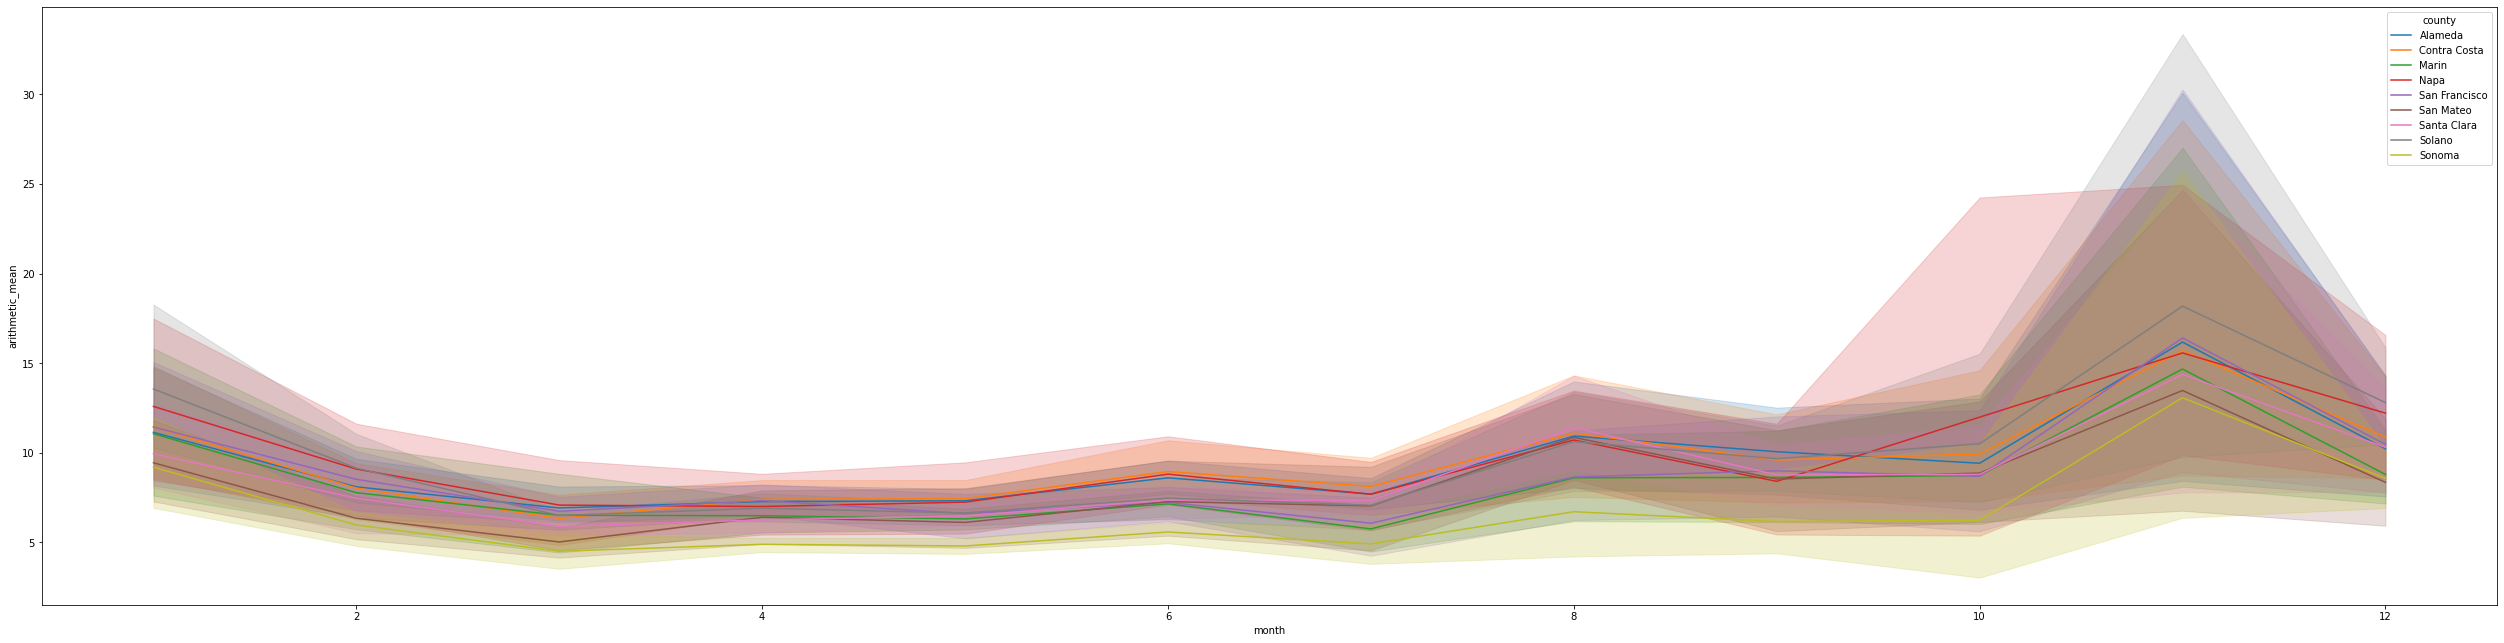

In [47]:
# looking at the months (caveat - we don't have 9-12 for teh year 2020)
fig, ax = plt.subplots(figsize=(44,11))
sns.lineplot(data=mean_date, ax=ax, x='month', y='arithmetic_mean', hue='county')

<AxesSubplot:xlabel='year', ylabel='arithmetic_mean'>

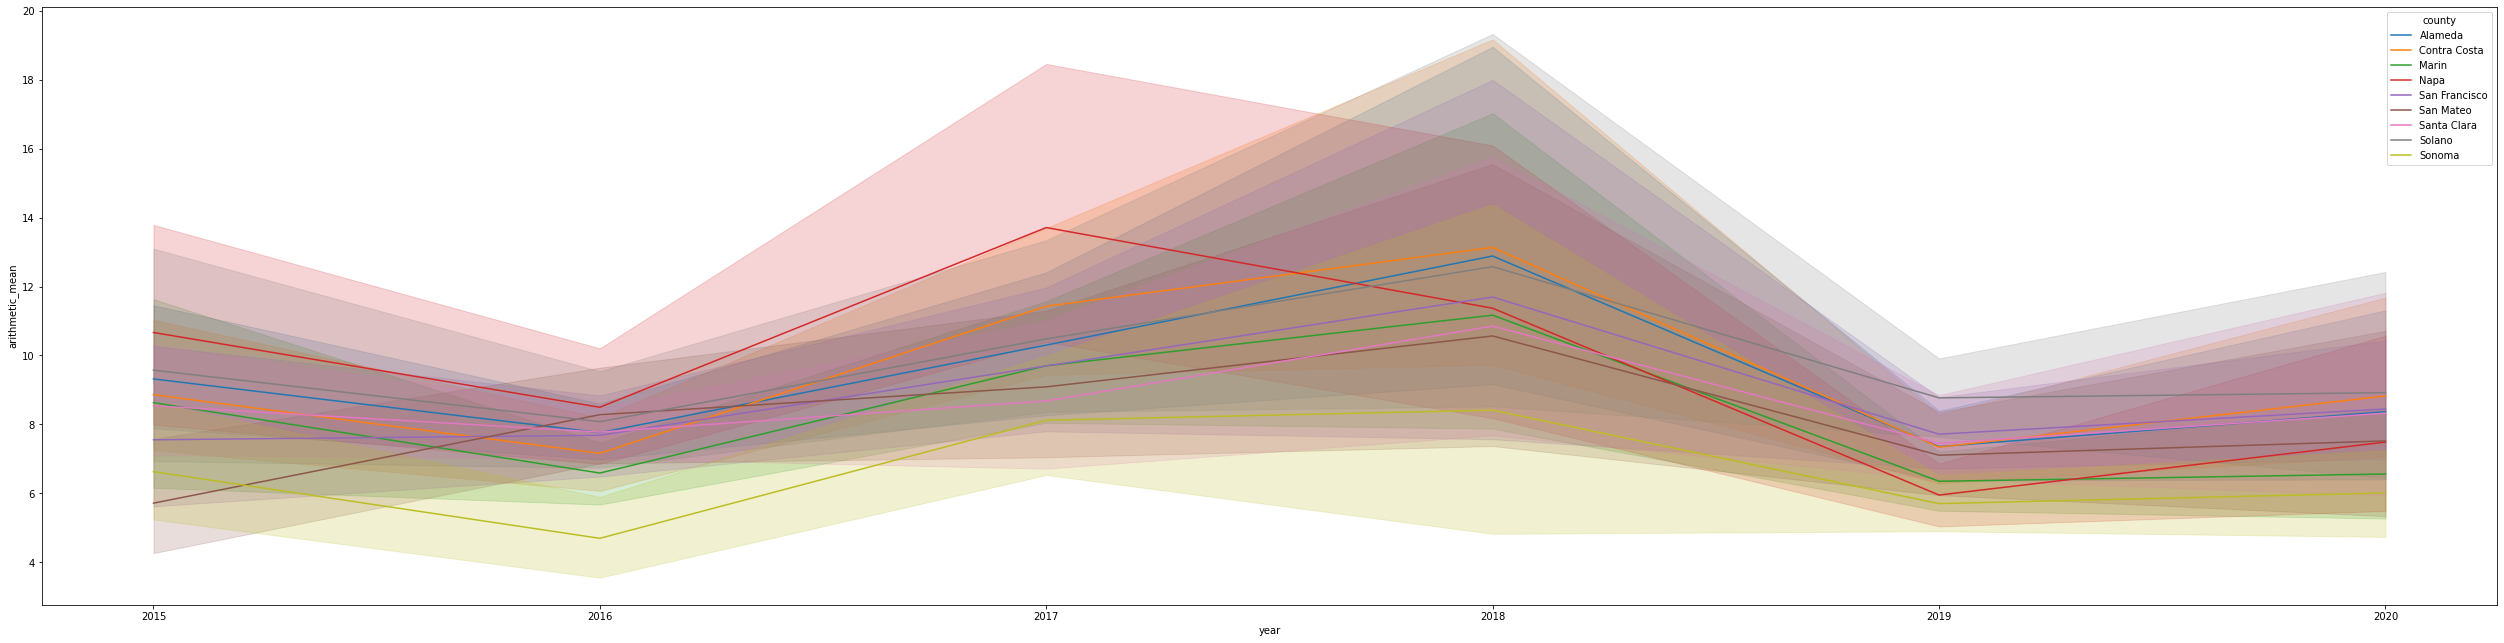

In [48]:
# looking at the year
fig, ax = plt.subplots(figsize=(44,11))
sns.lineplot(data=mean_date, ax=ax, x='year', y='arithmetic_mean', hue='county')

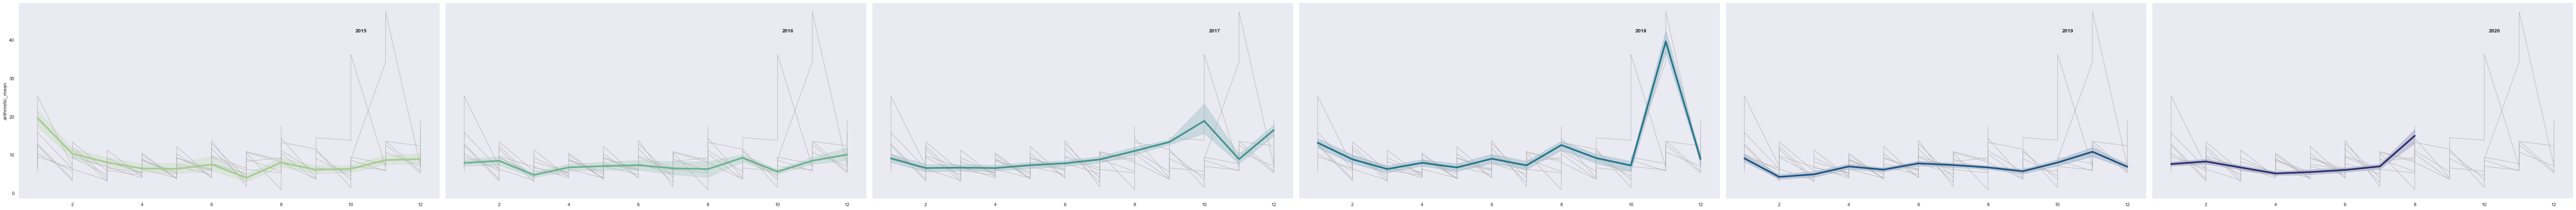

In [61]:
sns.set_theme(style="dark")

# Plot each year's time series in its own facet
g = sns.relplot(
    data=mean_date,
    x="month", y="arithmetic_mean", col="year", hue="year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    height=7, aspect=2, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=mean_date, x="month", y="arithmetic_mean", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "arithmetic_mean")
g.tight_layout()

In [53]:
df

,date_local,county,local_site_name,poc,arithmetic_mean,first_max_value,first_max_hour,city,month,year
0,2015-01-01,Contra Costa,Concord,3,23.125000,42.0,22,Concord,1,2015
1,2015-01-01,Solano,Vallejo,4,25.583333,59.0,21,Vallejo,1,2015
2,2015-01-01,Solano,Vallejo,3,24.583333,62.0,21,Vallejo,1,2015
3,2015-01-01,Alameda,Laney College,3,10.750000,42.0,21,Oakland,1,2015
4,2015-01-01,Alameda,Oakland West,3,13.000000,35.0,21,Oakland,1,2015
...,...,...,...,...,...,...,...,...,...,...
34223,2020-08-31,Napa,Napa Valley College,3,34.083333,58.0,10,Napa,8,2020
34224,2020-08-31,Santa Clara,San Jose - Jackson,3,15.916667,44.0,15,San Jose,8,2020
34225,2020-08-31,Contra Costa,San Pablo,3,16.750000,29.0,9,San Pablo,8,2020
34226,2020-08-31,Sonoma,Sebastopol,3,15.375000,78.0,10,Sebastopol,8,2020


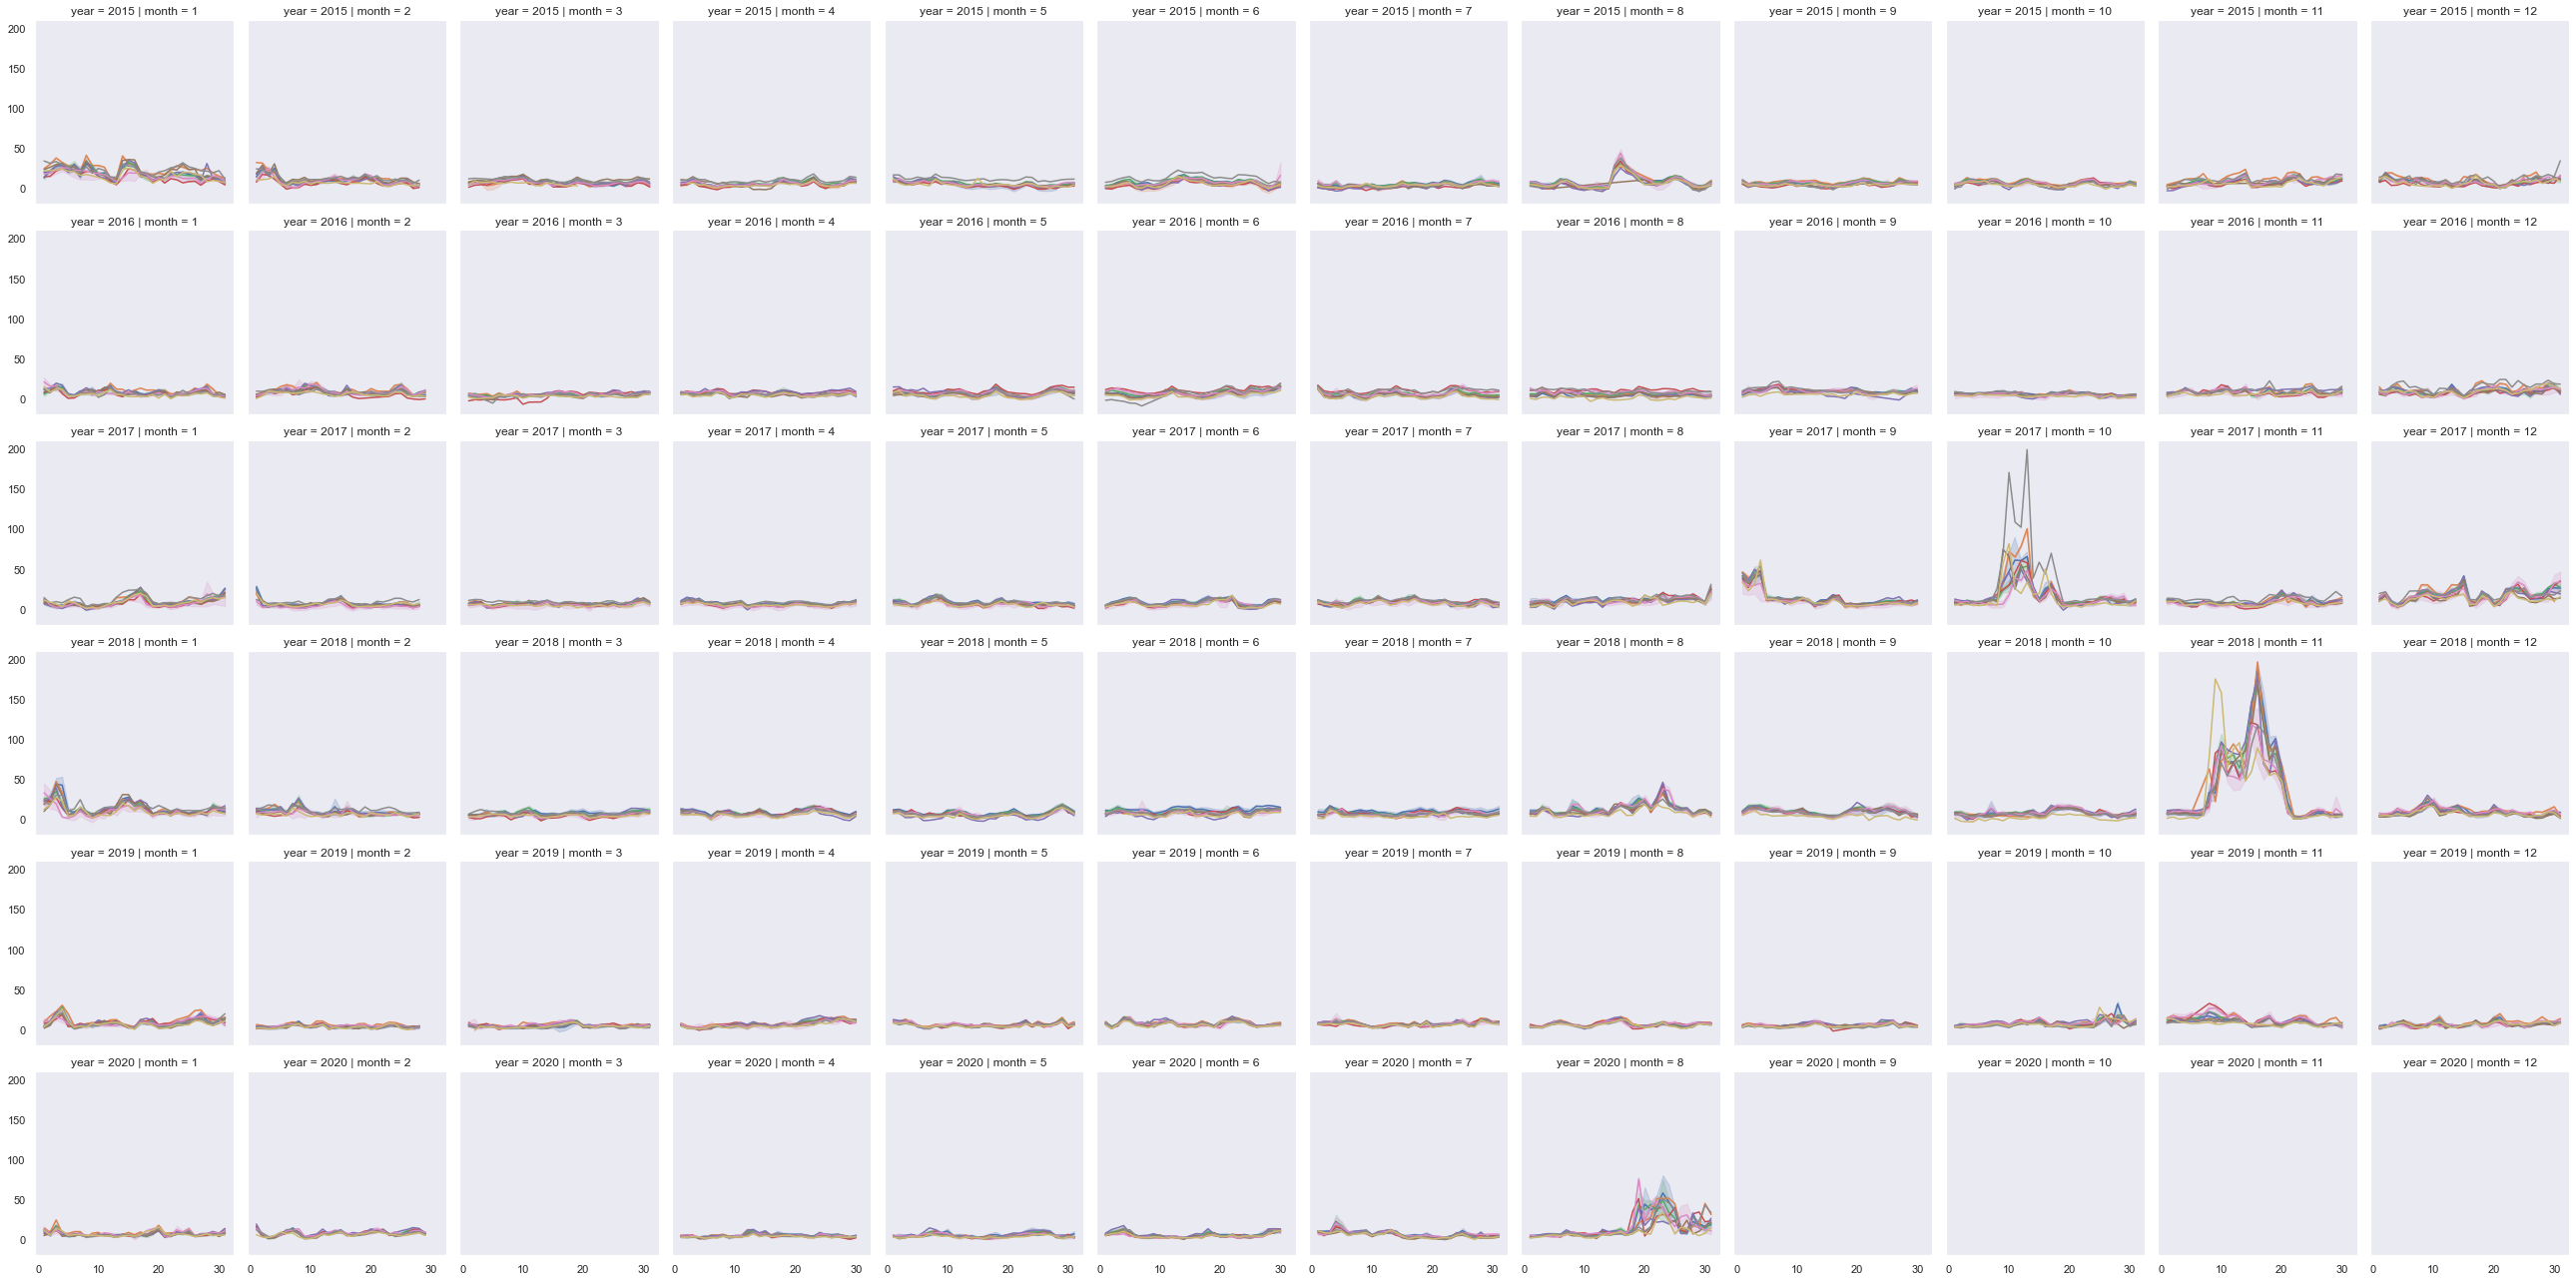

In [104]:
grid = sns.FacetGrid(df, col="month", row='year', hue="county")
grid.map_dataframe(sns.lineplot, x="day", y="arithmetic_mean")

In [ ]:
# we can see that we're missing data from 2020, the months 3, 9, 10, 11, and 12
# why does there seem to be so much variation between the counties 10/2017, 11/2-18, 8/2020

In [ ]:
# can you use a heatmap to map lat and long


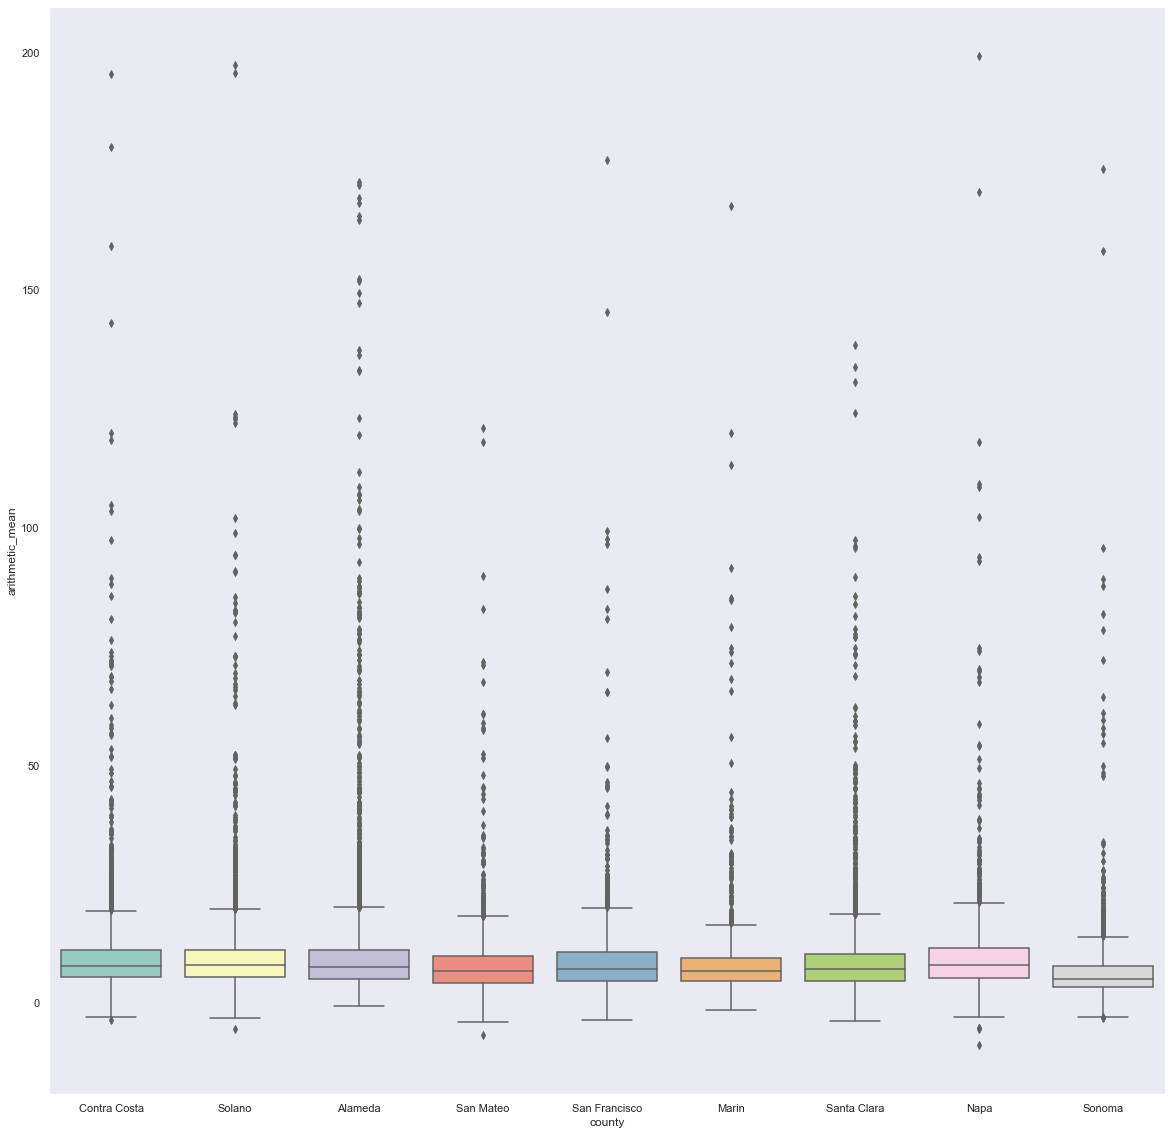

In [67]:
# How many outliers/days are there for each county (AVERAGES)
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df, x="county", y="arithmetic_mean", palette="Set3")

In [ ]:
# why is sonoma's median noticeably lower than the others
# we should make a density plot to see if Alameda actually has densely more outliers than the other counties
# we'll need to make sure that the number of sites in the county doesn't lead to more heavily weighted input

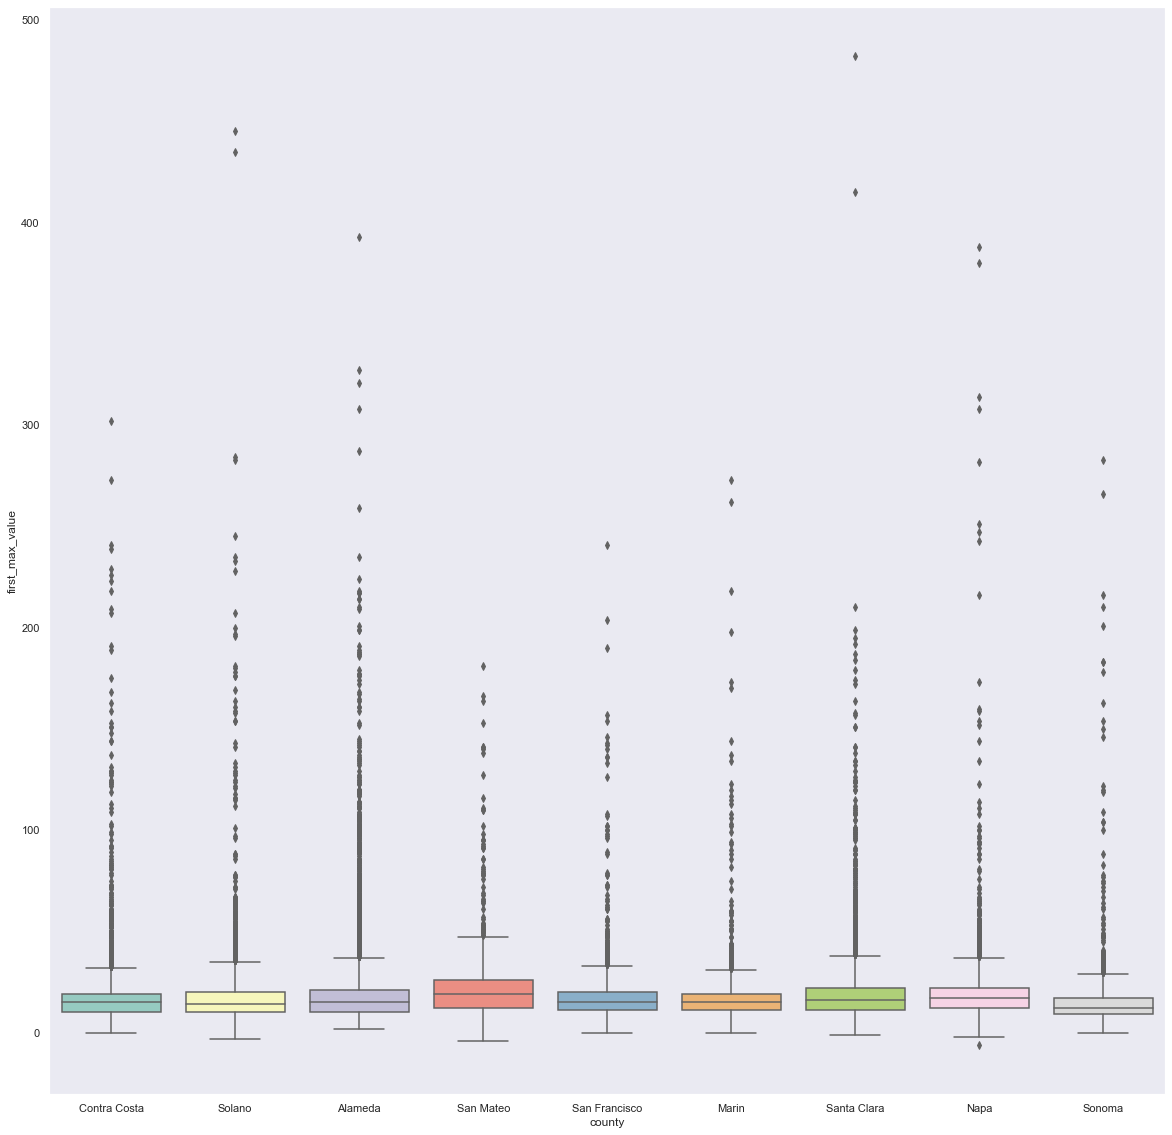

In [68]:
# How many outliers/days are there for each county (DAILY MAXIMUMS)
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df, x="county", y="first_max_value", palette="Set3")

In [110]:
df.set_index('date_local', inplace=True)

In [71]:
df

,county,local_site_name,poc,arithmetic_mean,first_max_value,first_max_hour,city,month,year
date_local,,,,,,,,,
2015-01-01,Contra Costa,Concord,3,23.125000,42.0,22,Concord,1,2015
2015-01-01,Solano,Vallejo,4,25.583333,59.0,21,Vallejo,1,2015
2015-01-01,Solano,Vallejo,3,24.583333,62.0,21,Vallejo,1,2015
2015-01-01,Alameda,Laney College,3,10.750000,42.0,21,Oakland,1,2015
2015-01-01,Alameda,Oakland West,3,13.000000,35.0,21,Oakland,1,2015
...,...,...,...,...,...,...,...,...,...
2020-08-31,Napa,Napa Valley College,3,34.083333,58.0,10,Napa,8,2020
2020-08-31,Santa Clara,San Jose - Jackson,3,15.916667,44.0,15,San Jose,8,2020
2020-08-31,Contra Costa,San Pablo,3,16.750000,29.0,9,San Pablo,8,2020


<AxesSubplot:xlabel='date_local'>

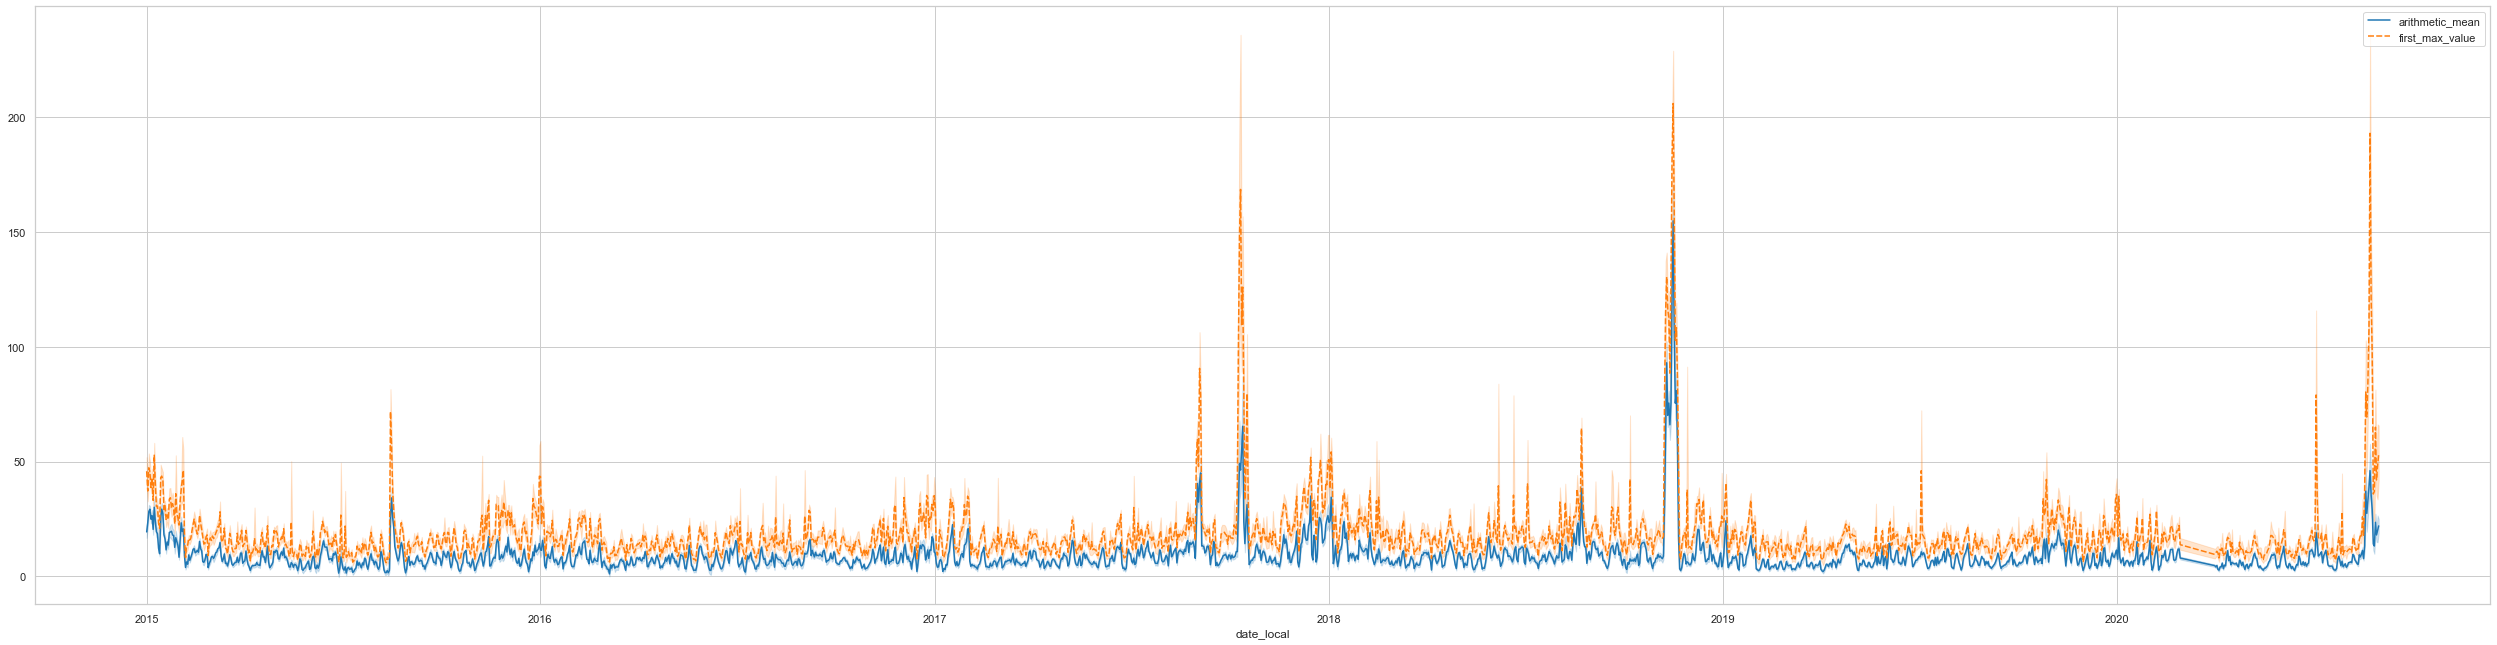

In [78]:
# look at the average vs the max
sns.set_theme(style="whitegrid")
plt.figure(figsize=(44,11))
sns.lineplot(data=df[['arithmetic_mean', 'first_max_value']], palette="tab10", linewidth=1.5)

In [117]:
df_avg_max = df[['arithmetic_mean', 'first_max_value', 'year', 'month']]
df_avg_max

,arithmetic_mean,first_max_value,year,month
date_local,,,,
2015-01-01,23.125000,42.0,2015,1
2015-01-01,25.583333,59.0,2015,1
2015-01-01,24.583333,62.0,2015,1
2015-01-01,10.750000,42.0,2015,1
2015-01-01,13.000000,35.0,2015,1
...,...,...,...,...
2020-08-31,34.083333,58.0,2020,8
2020-08-31,15.916667,44.0,2020,8
2020-08-31,16.750000,29.0,2020,8


In [ ]:
df

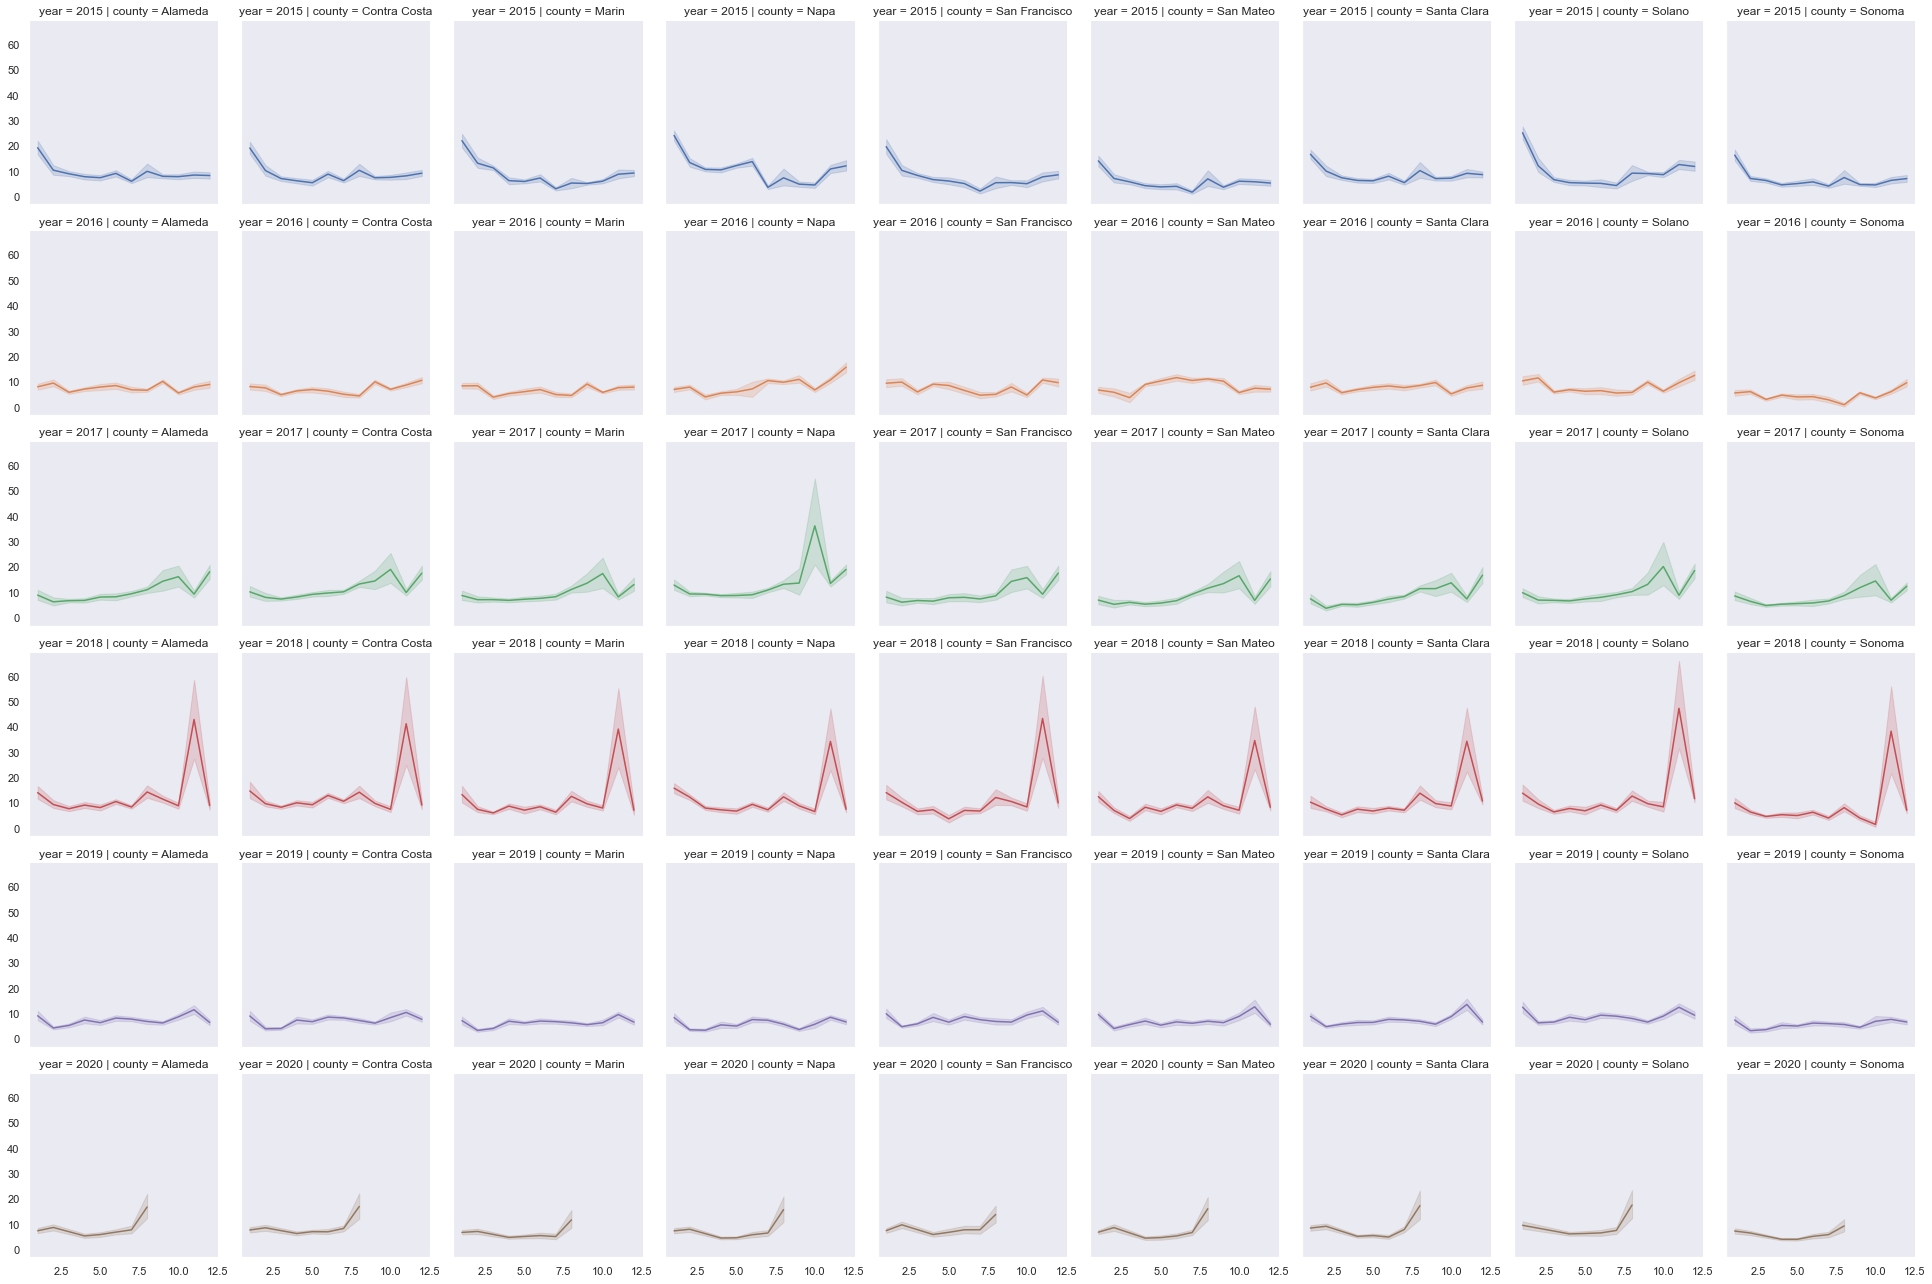

In [146]:
super_grouper = df.groupby(by=['year', 'month', 'day', 'county']).mean()
sg = super_grouper.reset_index()
sg
grid_county = sns.FacetGrid(sg, col="county", row='year', hue="year")
grid_county.map_dataframe(sns.lineplot, x="month", y="arithmetic_mean")

In [ ]:
# Napa in 2017 peaks higher than other counties
# san mateo also seems a bit higher than the others

In [ ]:
# we could plot the differences of each from the average (the deviation)


In [24]:
group_county = df.groupby(by=['county'])
avg_county = group_county.mean()
avg_county

,poc,arithmetic_mean,first_max_value,first_max_hour
county,,,,
Alameda,3.000000,9.455176,18.461613,11.628858
Contra Costa,3.000000,9.526414,18.087019,11.811033
Marin,3.000000,8.310437,17.492440,13.231855
Napa,3.000000,9.786751,20.988574,9.959265
San Francisco,3.000000,8.815628,18.194940,11.274306
San Mateo,3.000000,8.079441,20.905117,11.143070
Santa Clara,3.000000,8.626159,19.187415,11.457037
Solano,3.500128,9.765879,18.570187,11.574278
Sonoma,3.000000,6.646275,15.523691,10.949626


<AxesSubplot:xlabel='county'>

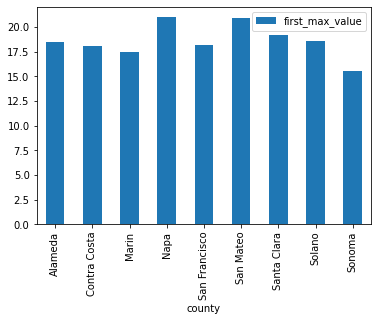

In [28]:
avg_county.plot.bar( y='first_max_value')